# DETECTING NUTRITIONAL DEFICIENCY USING CNN - SOFT COMPUTING 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array,array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

C:\Users\DELL\AppData\Local\Temp\ipykernel_10584\1972314943.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


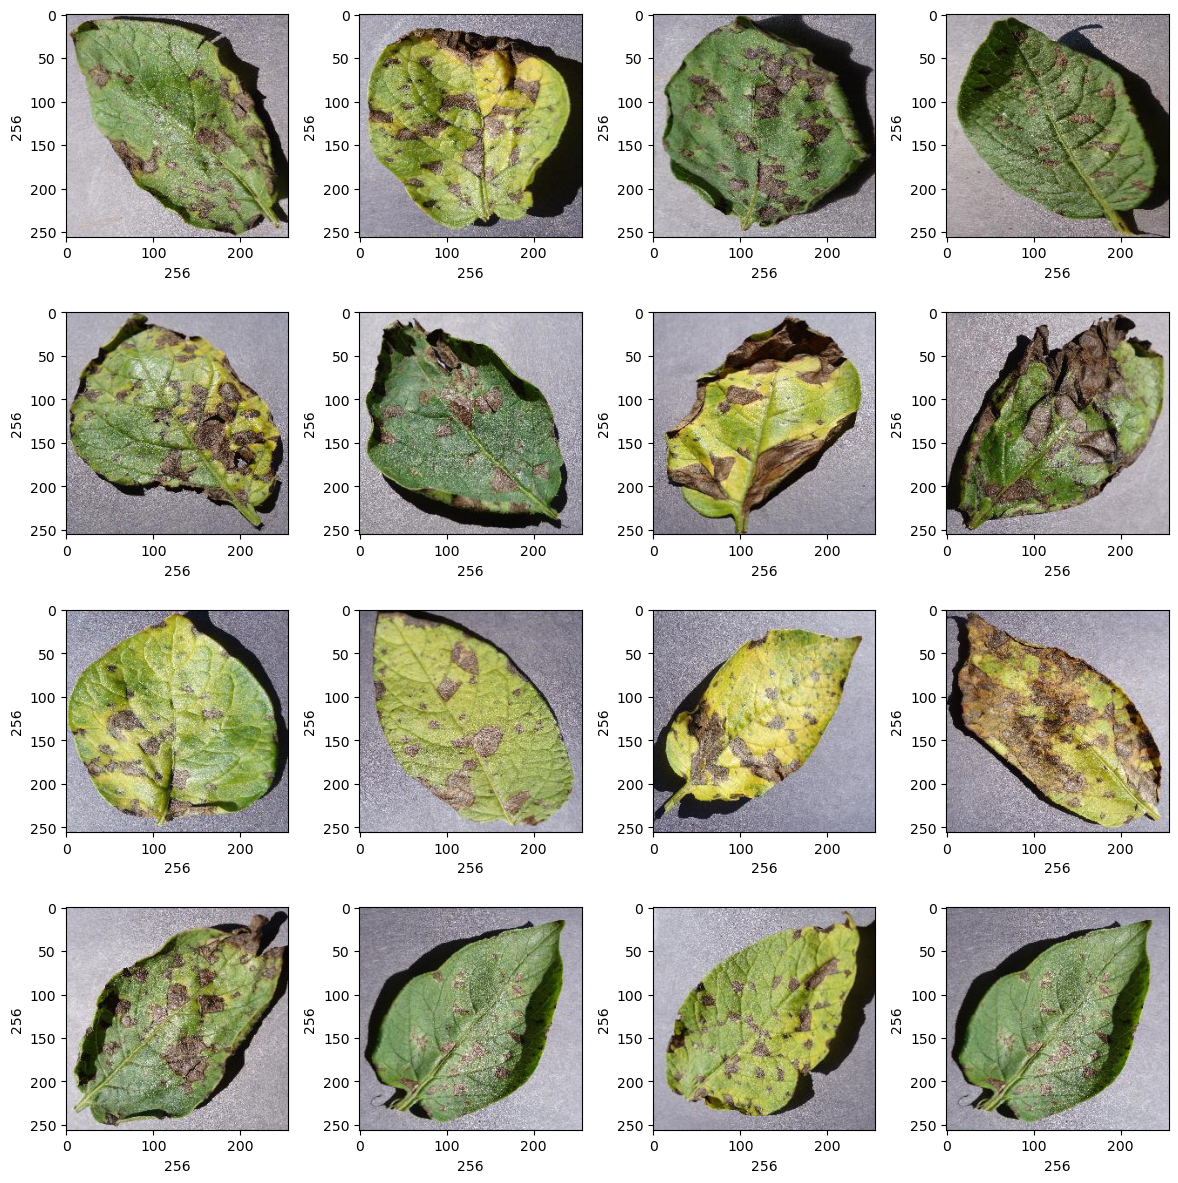

In [2]:
# Plotting 12 images to check dataset
# Now we will observe some of the images that are their in our dataset. We will plot 12 images here using the matplotlib library.
plt.figure(figsize=(12,12))
path = "/Plant_images/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [3]:
# Converting Images to array 
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [1]:
def extract_leaf_features(image_path):
    # Read the image
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Unable to read image at path '{image_path}'")
        return None

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("Error: No contours found in the image")
        return None

    # Select the largest contour (leaf shape)
    contour = max(contours, key=cv2.contourArea)

    # Calculate shape features
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    # Calculate color features (mean color)
    mean_color = np.mean(img, axis=(0, 1))

    # Return a dictionary of features
    features = {
        'Area': area,
        'Perimeter': perimeter,
        'Mean Color': mean_color.tolist()  # Convert to list for JSON serialization
    }

    return features

In [2]:
def main():
    # Genetic algorithm to optimize feature selection
    population = toolbox.population(n=50)
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

    best_individual = tools.selBest(population, k=1)[0]
    selected_features = [features[i] for i, include in enumerate(best_individual) if include]
    print("Best individual:", best_individual)
    print("Selected features:", selected_features)

    # Continue with the rest of the model training using the selected features
    dir = "/Plant_images"
    root_dir = listdir(dir)
    image_list, label_list = [], []
    all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
    binary_labels = [0, 1, 2]
    temp = -1


In [4]:
dir = "/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)__Common_rust_', 'Potato__Early_blight', 'Tomato__Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
# Now we will convert all the images into numpy array.

for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [5]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

# it is a balanced dataset as you can see

0    300
1    300
2    300
Name: count, dtype: int64

In [6]:
# Next we will observe the shape of the image.
image_list[0].shape

(256, 256, 3)

In [7]:
# Checking the total number of the images which is the length of the labels list.
label_list = np.array(label_list)
label_list.shape

(900,)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [9]:
# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# MODEL 1

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.001),metrics=['accuracy'])

In [13]:
# Next we will split the dataset into validation and training data.
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [17]:
# Training the model
epochs = 40
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/40
5/5 [==============================] - 4s 745ms/step - loss: 0.7263 - accuracy: 0.6597 - val_loss: 0.7038 - val_accuracy: 0.7153
Epoch 2/40
5/5 [==============================] - 3s 681ms/step - loss: 0.7238 - accuracy: 0.6545 - val_loss: 0.7016 - val_accuracy: 0.7153
Epoch 3/40
5/5 [==============================] - 4s 805ms/step - loss: 0.7218 - accuracy: 0.6580 - val_loss: 0.6994 - val_accuracy: 0.7083
Epoch 4/40
5/5 [==============================] - 4s 698ms/step - loss: 0.7192 - accuracy: 0.6545 - val_loss: 0.6974 - val_accuracy: 0.6250
Epoch 5/40
5/5 [==============================] - 4s 694ms/step - loss: 0.7171 - accuracy: 0.6528 - val_loss: 0.6957 - val_accuracy: 0.6181
Epoch 6/40
5/5 [==============================] - 4s 706ms/step - loss: 0.7153 - accuracy: 0.6493 - val_loss: 0.6938 - val_accuracy: 0.6319
Epoch 7/40
5/5 [==============================] - 4s 719ms/step - loss: 0.7134 - accuracy: 0.6667 - val_loss: 0.6917 - val_accuracy: 0.6319
Epoch 8/40
5/5 [====

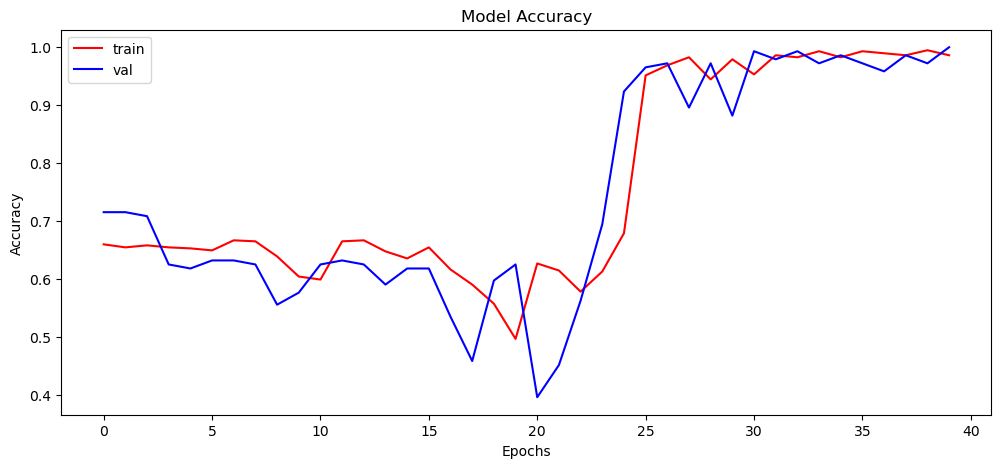

In [18]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [19]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
acc1 = scores[1]*100
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 0s 46ms/step - loss: 0.2985 - accuracy: 0.9889
Test Accuracy: 98.88888597488403


In [20]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 50ms/step


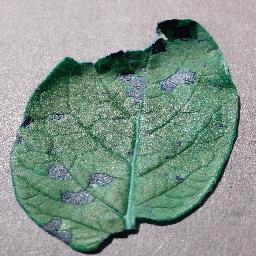

In [21]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [22]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato__Early_blight
Predicted :  Potato__Early_blight


# MODEL 2

In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 85, 85, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 28224)             0         
                                                                 
 dense_2 (Dense)             (None, 8)                

In [24]:
from tensorflow.keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(learning_rate = 0.001),metrics=['accuracy'])

In [25]:
# Next we will split the dataset into validation and training data.
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [27]:
# Training the model
epochs = 40
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/40
4/4 [==============================] - 3s 729ms/step - loss: 0.6356 - accuracy: 0.6587 - val_loss: 0.6287 - val_accuracy: 0.6983
Epoch 2/40
4/4 [==============================] - 3s 693ms/step - loss: 0.6220 - accuracy: 0.6587 - val_loss: 0.5979 - val_accuracy: 0.6983
Epoch 3/40
4/4 [==============================] - 3s 737ms/step - loss: 0.6064 - accuracy: 0.6587 - val_loss: 0.5882 - val_accuracy: 0.6983
Epoch 4/40
4/4 [==============================] - 3s 695ms/step - loss: 0.6021 - accuracy: 0.6543 - val_loss: 0.5822 - val_accuracy: 0.6983
Epoch 5/40
4/4 [==============================] - 3s 743ms/step - loss: 0.5842 - accuracy: 0.6587 - val_loss: 0.5639 - val_accuracy: 0.6983
Epoch 6/40
4/4 [==============================] - 3s 735ms/step - loss: 0.5742 - accuracy: 0.6587 - val_loss: 0.5550 - val_accuracy: 0.6983
Epoch 7/40
4/4 [==============================] - 3s 701ms/step - loss: 0.5719 - accuracy: 0.6587 - val_loss: 0.5569 - val_accuracy: 0.6983
Epoch 8/40
4/4 [====

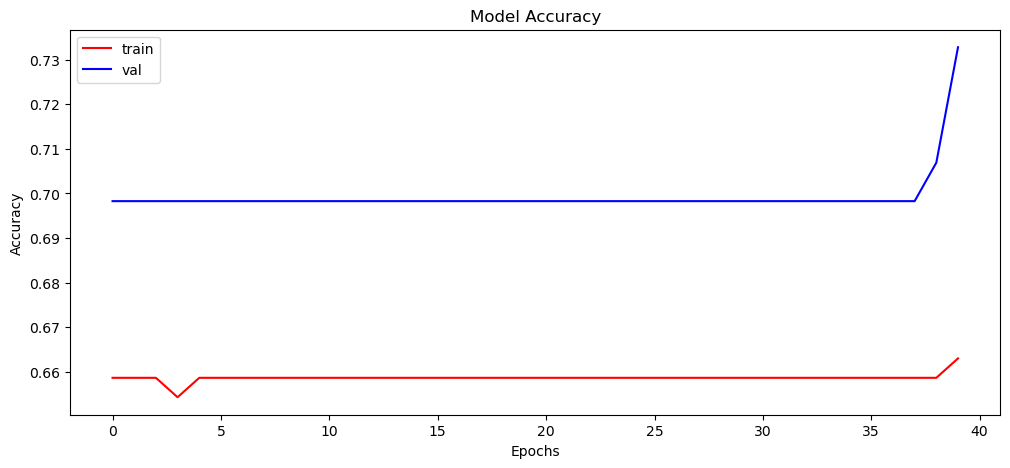

In [28]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [29]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
acc2 = scores[1]*100
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 0s 48ms/step - loss: 0.3764 - accuracy: 0.7111
Test Accuracy: 71.11111283302307


In [30]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 44ms/step


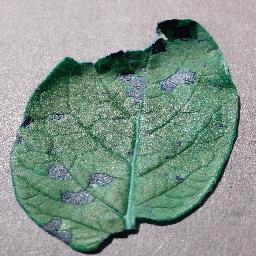

In [31]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [32]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato__Early_blight
Predicted :  Potato__Early_blight


# MODEL 3

In [33]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="gelu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 85, 85, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 28224)             0         
                                                                 
 dense_4 (Dense)             (None, 8)                

In [34]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.001),metrics=['accuracy'])

In [35]:
# Next we will split the dataset into validation and training data.
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [36]:
# Training the model
epochs = 10
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/10
3/3 [==============================] - 5s 869ms/step - loss: 0.9526 - accuracy: 0.4538 - val_loss: 0.6235 - val_accuracy: 0.7174
Epoch 2/10
3/3 [==============================] - 2s 833ms/step - loss: 0.5029 - accuracy: 0.7853 - val_loss: 0.3805 - val_accuracy: 0.8478
Epoch 3/10
3/3 [==============================] - 2s 749ms/step - loss: 0.3207 - accuracy: 0.8967 - val_loss: 0.4345 - val_accuracy: 0.8152
Epoch 4/10
3/3 [==============================] - 2s 758ms/step - loss: 0.2572 - accuracy: 0.9212 - val_loss: 0.2411 - val_accuracy: 0.8913
Epoch 5/10
3/3 [==============================] - 2s 750ms/step - loss: 0.2067 - accuracy: 0.9185 - val_loss: 0.2202 - val_accuracy: 0.9130
Epoch 6/10
3/3 [==============================] - 2s 758ms/step - loss: 0.1444 - accuracy: 0.9457 - val_loss: 0.1652 - val_accuracy: 0.9457
Epoch 7/10
3/3 [==============================] - 2s 750ms/step - loss: 0.1203 - accuracy: 0.9647 - val_loss: 0.1433 - val_accuracy: 0.9457
Epoch 8/10
3/3 [====

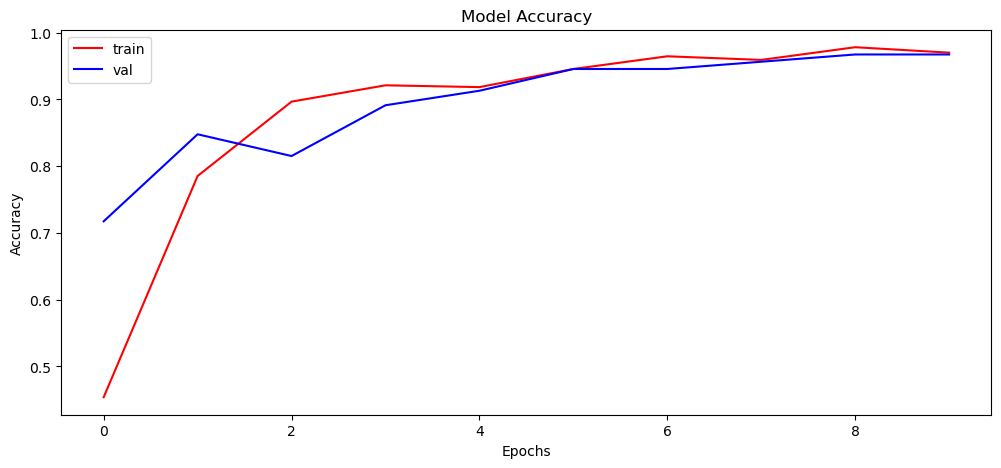

In [37]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [38]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
acc3 = scores[1]*100
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 0s 44ms/step - loss: 0.0641 - accuracy: 0.9833
Test Accuracy: 98.33333492279053


In [39]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 48ms/step


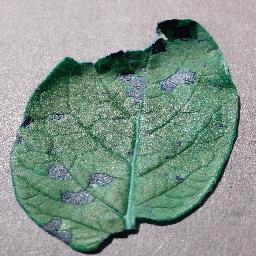

In [40]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [41]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato__Early_blight
Predicted :  Potato__Early_blight


# MODEL 4

In [42]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="gelu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 85, 85, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 28224)             0         
                                                                 
 dense_6 (Dense)             (None, 8)                

In [43]:
from tensorflow.keras.optimizers import Adagrad
model.compile(loss = 'categorical_crossentropy', optimizer = Adagrad(0.001),metrics=['accuracy'])

In [44]:
# Next we will split the dataset into validation and training data.
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [48]:
# Training the model
epochs = 40
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/40
3/3 [==============================] - 2s 581ms/step - loss: 0.7750 - accuracy: 0.7483 - val_loss: 0.7357 - val_accuracy: 0.8378
Epoch 2/40
3/3 [==============================] - 2s 535ms/step - loss: 0.7682 - accuracy: 0.7483 - val_loss: 0.7817 - val_accuracy: 0.6486
Epoch 3/40
3/3 [==============================] - 2s 542ms/step - loss: 0.7171 - accuracy: 0.7279 - val_loss: 0.6382 - val_accuracy: 0.7027
Epoch 4/40
3/3 [==============================] - 2s 541ms/step - loss: 0.6277 - accuracy: 0.7619 - val_loss: 0.5995 - val_accuracy: 0.7027
Epoch 5/40
3/3 [==============================] - 2s 542ms/step - loss: 0.5976 - accuracy: 0.7483 - val_loss: 0.7248 - val_accuracy: 0.7027
Epoch 6/40
3/3 [==============================] - 2s 559ms/step - loss: 0.7413 - accuracy: 0.6735 - val_loss: 0.6055 - val_accuracy: 0.6892
Epoch 7/40
3/3 [==============================] - 2s 542ms/step - loss: 0.6668 - accuracy: 0.6361 - val_loss: 0.5126 - val_accuracy: 0.8108
Epoch 8/40
3/3 [====

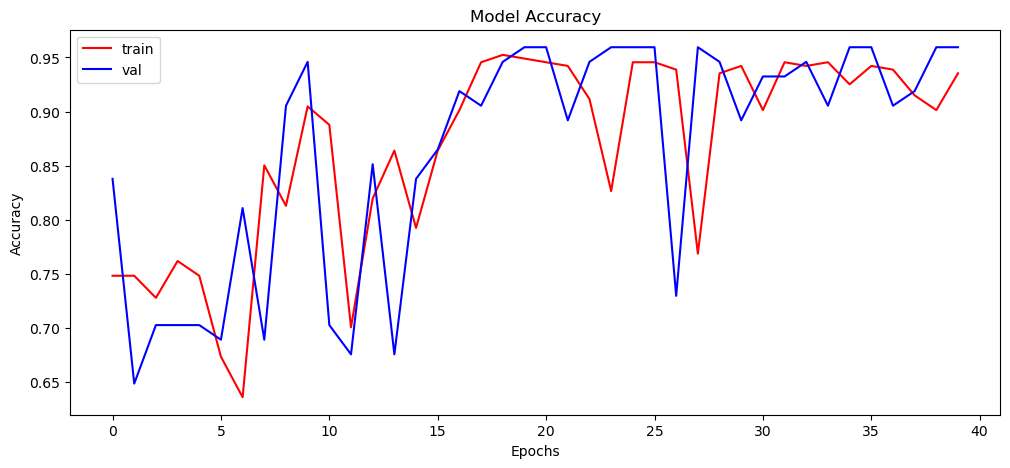

In [49]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [50]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
acc4 = scores[1]*100
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 0s 42ms/step - loss: 0.1711 - accuracy: 0.9500
Test Accuracy: 94.9999988079071


In [51]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 46ms/step


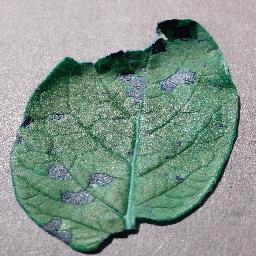

In [52]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [53]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato__Early_blight
Predicted :  Potato__Early_blight


# MODEL 5

In [54]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="gelu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 85, 85, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 28224)             0         
                                                                 
 dense_8 (Dense)             (None, 8)                

In [55]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(0.001),metrics=['accuracy'])

In [59]:
# Training the model
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/20
3/3 [==============================] - 2s 583ms/step - loss: 0.6574 - accuracy: 0.9422 - val_loss: 0.7373 - val_accuracy: 0.6757
Epoch 2/20
3/3 [==============================] - 2s 542ms/step - loss: 0.6724 - accuracy: 0.7993 - val_loss: 0.6658 - val_accuracy: 0.9595
Epoch 3/20
3/3 [==============================] - 2s 542ms/step - loss: 0.6111 - accuracy: 0.9456 - val_loss: 0.7569 - val_accuracy: 0.6622
Epoch 4/20
3/3 [==============================] - 2s 550ms/step - loss: 0.6520 - accuracy: 0.8707 - val_loss: 0.7496 - val_accuracy: 0.7297
Epoch 5/20
3/3 [==============================] - 2s 534ms/step - loss: 0.6495 - accuracy: 0.8810 - val_loss: 0.6681 - val_accuracy: 0.7297
Epoch 6/20
3/3 [==============================] - 2s 551ms/step - loss: 0.5698 - accuracy: 0.8980 - val_loss: 0.6241 - val_accuracy: 0.9189
Epoch 7/20
3/3 [==============================] - 2s 543ms/step - loss: 0.5805 - accuracy: 0.8673 - val_loss: 0.5535 - val_accuracy: 0.9730
Epoch 8/20
3/3 [====

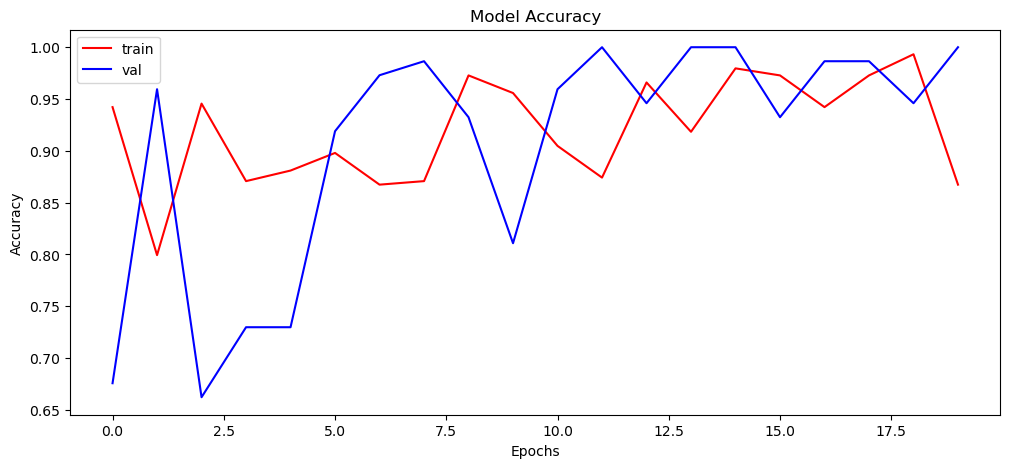

In [60]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [61]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
acc5 = scores[1]*100
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 0s 50ms/step - loss: 0.0717 - accuracy: 0.9778
Test Accuracy: 97.77777791023254


In [62]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 46ms/step


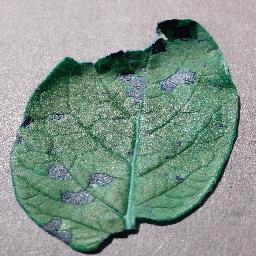

In [63]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [64]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato__Early_blight
Predicted :  Potato__Early_blight


# RESULT ANALYSIS

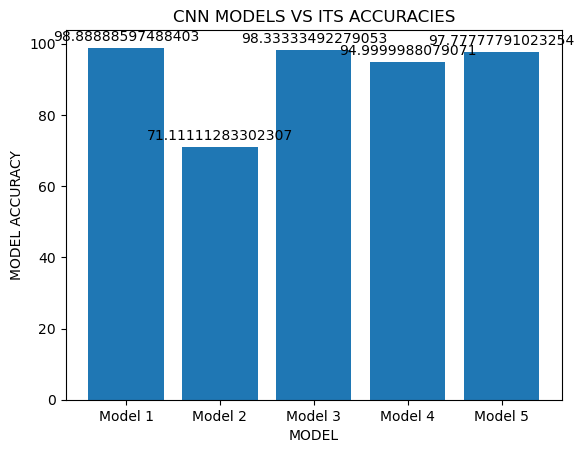

In [65]:
import matplotlib.pyplot as plt

x_label = ["Model 1", "Model 2", "Model 3", "Model 4", "Model 5"]
y_label = [acc1,acc2,acc3,acc4,acc5]
plt.bar(x_label, y_label)
plt.xlabel('MODEL')
plt.ylabel('MODEL ACCURACY')
plt.title('CNN MODELS VS ITS ACCURACIES')
plt.xticks(x_label)
for i, v in enumerate(y_label):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()

Thus, MODEL 3 which uses RELU, RELU, GELU, SOFTMAX activation functions and ADAGRAD optimizer gives maximum accuracy of 98%